# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №4. Математическая статистика в анализе данных

Задание выполнил(а): Бородин Владимир

### Общая информация

__Дата выдачи:__ 22.11.2022

__Дедлайн:__ 04:00 07.12.2022

### Оценивание и штрафы

Каждое задание оценивается в 4 балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{stat}} \times 1/2 ,
$$

где $s_{\text{stat}}$  — количество баллов, которое вы набрали в сумме по всем заданиям.

За сдачу домашнего задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

В данном домашнем задании вы попрактикуетесь в решении реальных бизнес-задач, связанных с анализом данных и применением методов математической статистики в таких задачах. В данном домашнем задании вам, возможно, понадобится больше чем обычно гуглить и читать различные статьи, получая информацию, при чем не только практического, но и теоретического характера. Это ***нормально*** и как раз поможет разобраться вам в материале, через изучение тех или иных вещей самостоятельно в понятном и комфортном для вас темпе.

Обратите внимание, что фактически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, поскольку большая часть баллов будет выставляться именно за выводы, так как в анализе данных именно они имеют ключевое, итоговое значение и результат. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*. Написанные выводы подтверждайте выполненным кодом программы.

При выполненнии заданий в данном домашнем задании нет никаких ограничений на используемые библиотеки и применяемые вами методы, функционал.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from numpy.random import binomial
from numpy.random import normal
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import t, norm
%matplotlib inline

### Задание 1


Проанализировать набор данных и ответить на следующие вопросы:

1) Какой % наблюдений выходит за 5 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [4]:
data = pd.read_csv('test_1_1 (1).csv', delimiter=';')
data.head()

,Unnamed: 0,metrics
0,1,1
1,2,1
2,3,4
3,4,1
4,5,1


Стодбец без имени нам не нужен, так как он просто дублирует нумерацию, которая и так есть


In [5]:
data = data.drop(data.columns[0], axis=1)

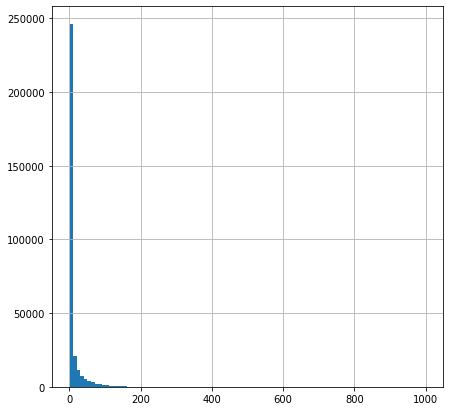

In [6]:
plt.figure(figsize=(7,7))
plt.hist(data['metrics'], bins=100)
plt.grid(True)

In [7]:
f = np.percentile(data['metrics'], 5)
nf = np.percentile(data['metrics'], 95)
data[(data['metrics'] > nf) | (data['metrics'] < f)].shape[0] / data.shape[0]

0.04987306046493438

4.95% данных выходят за 5% и 95% перцентиль

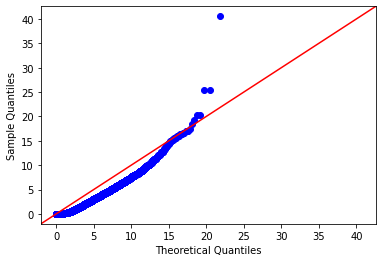

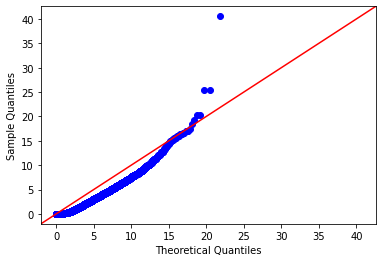

In [8]:
from statsmodels.api import qqplot
from scipy.stats import norm, ncx2, chi2
from scipy.stats import skewnorm
qqplot(data['metrics'], chi2, line='45', fit=True)

Воспользовавшись qqplot, можно заметить, что данное распределение довольно похоже на Хи-квадрат несмотря на "выбросы". Больше никакого подходящего распределения я не нашел. Если хи-квадрат - частный случай гамма-распределения, то при других параметрах можно подобрать более точное распределение. 

### Задание 2



Определить, можно сравнить две представленные выборки t критерием Стьюдента? 

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать 

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

*Вместе с ответом на задание приложить код*

In [9]:
data_2 = pd.read_csv('test_1_2.csv', delimiter=';')
data_2.head()

,Unnamed: 0,variant,metrics
0,1,A,1
1,2,B,1
2,3,A,4
3,4,B,37
4,5,B,4


In [10]:
data_2 = data_2.drop(data_2.columns[0], axis=1)

Как связные, так и несвязные выборки должны иметь нормальное распределение, но в случае несвязных еще необходимо чтобы дисперсии были примерно одинаковыми(гомогенность) для использования t-критерия стьюдента. Проверим сначала, что выборки имеют нормальное распределение. Сделаем это через критерий Шапиро-Уилка. Определим уровень значимости = 5%. Нулевая гипотеза: обе выборки из случайных величин распределены нормально.

In [11]:
from scipy.stats import shapiro
shapiro(data)
from scipy.stats import levene

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [12]:
a = data_2[data_2['variant']=='A']
a = a.drop(columns='variant')
b = data_2[data_2['variant']=='B']
b = b.drop(columns='variant')

In [13]:
#проверка на гомогенность дисперсий
levene(a['metrics'], b['metrics'])

LeveneResult(statistic=4.313416821004634, pvalue=0.03781432358426188)

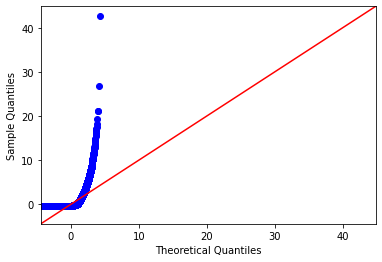

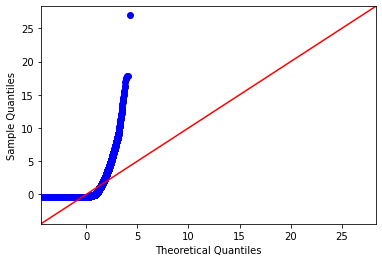

In [14]:
#проверим на нормальность распределенияя
from statsmodels.api import qqplot
from scipy.stats import norm
from scipy.stats import skewnorm
graph = qqplot(a['metrics'], norm, line='45', fit=True)
graph = qqplot(b['metrics'], norm, line='45', fit=True)

In [15]:
np.var(b)

metrics    522.605666
dtype: float64

In [16]:
np.var(a)

metrics    534.997985
dtype: float64

In [17]:
a.mean()

metrics    10.099562
dtype: float64

In [18]:
b.mean()

metrics    10.333137
dtype: float64

Исходя из графика мы видим, что обе подвыборки не имеют нормального распределения. Также у нас не соблюдается гомогенность дисперсий, так как p-value получилось 0.0378 - это значение меньше уровня значимости, установленного нами в 5%. Теоретически, критерий t-стьюдента можно использовать, так как выборки огромные, но лучше будет использовать z-тест.

### Задание 3



Дано две выборки по А/Б тесту.

Две выборки несбалансированные - кол-во пользователей в каждой группе разные.

Метрика, которую меряем в эксперименте (и которую используем для определения группы, которая лучше себя показала) - кол-во просмотренных страниц на пользователя 

Как вы будете принимать решение, какая группа лучше А или Б, и какие статистические методы (критерии) вы будете использовать, какие преобразования к данным применять? P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и работу с несбалансированными выборками

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [38]:
data_3 = pd.read_csv('hw2_test_1_3.csv', delimiter=';')
data_3.head()

,Unnamed: 0,variant,metrics
0,1,A,1
1,2,A,4
2,3,A,15
3,4,A,1
4,5,A,10


In [39]:
data_3 = data_3.drop(data_3.columns[0], axis=1)

In [40]:
data_3[data_3['variant'] == 'A'], data_3[data_3['variant'] == 'D']

(       variant  metrics
 0            A        1
 1            A        4
 2            A       15
 3            A        1
 4            A       10
 ...        ...      ...
 108093       A        4
 108095       A        1
 108096       A       12
 108097       A        8
 108098       A        1
 
 [92686 rows x 2 columns],        variant  metrics
 8            D        2
 13           D        1
 14           D        1
 25           D        1
 43           D        1
 ...        ...      ...
 108073       D        1
 108077       D        1
 108090       D        1
 108091       D        2
 108094       D        1
 
 [15413 rows x 2 columns])

В первый выборке 92686 значений, а во второй - 15413. Сделаем t-тест. Нулевая гипотеза: данные в группах А и В не имеют различий.


In [41]:
X_1 = data_3[data_3['variant'] == 'A']
X_1

,variant,metrics
0,A,1
1,A,4
2,A,15
3,A,1
4,A,10
...,...,...
108093,A,4
108095,A,1
108096,A,12
108097,A,8


In [42]:
Y_1 = data_3[data_3['variant'] == 'D']
Y_1

,variant,metrics
8,D,2
13,D,1
14,D,1
25,D,1
43,D,1
...,...,...
108073,D,1
108077,D,1
108090,D,1
108091,D,2


In [43]:
ttest_ind(X_1['metrics'], Y_1['metrics'])

Ttest_indResult(statistic=0.7874553679694077, pvalue=0.4310170723227551)

P-value равен 43%, это больше установленного нами в 5%, значит мы не можем отвергать гипотезу о том, что данные двух групп не имеют различий. 

In [44]:
data_3[data_3['variant'] == 'A'].mean()

<ipython-input-44-28932eda0c73>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_3[data_3['variant'] == 'A'].mean()


metrics    10.099562
dtype: float64

In [45]:
data_3[data_3['variant'] == 'D'].mean()

<ipython-input-45-0e1f949da17b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_3[data_3['variant'] == 'D'].mean()


metrics    9.942386
dtype: float64

In [46]:
np.var(X_1), np.var(Y_1)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


(metrics    534.997985
 dtype: float64, metrics    475.328933
 dtype: float64)

Среднее значение в обеих группах приблизительно одинаковое: в А - 10.01, а в В - 9.94. Исходя из того, что данные не имеют различий, делаем вывод, что вариант А слегка лучше, но значимых различий в CTR нет.

### Задание 4



Есть данные с большой дисперсии у метрики (диспресию метрики можно посчитать для каждой группы). Для их дальнейшего анализа дисперсию необходимо сократить. Как определить, что дисперсия действительно большая? Если она большая, как вы будете ее чистить? Ответ аргументировать и описать.  P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и снижение дисперсии в них

Описание данных: 

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

*Вместе с ответом на задание приложить код*

In [48]:
data_4 = pd.read_csv('test_1_1 (2).csv', delimiter=';')
data_4.head()

,Unnamed: 0,metrics
0,1,1
1,2,1
2,3,4
3,4,1
4,5,1


In [50]:
np.var(data_4['metrics'])

511.99656406405427

Если дисперсия велика, то это означает большой разброс значений случайной величины, концентрация значений случайной величины около какого-нибудь центра исключается. Построив график, мы сможем определить, большая ли у нас дисперсия.

Считая дисперсию, мы считаем отклонение каждой точки от выборочного среднего. Если мы будем проводить несколько А/В тестов, то выборочные средние распределятся нормально, а их дисперсии будут равняться величине: S = sigma/sqrt(n). Значит, мы можем преобразовать дисперсию выборки в стандартную ошибку ее среднего. 

In [60]:
new_var = np.sqrt(np.var(data_4['metrics'])) / np.sqrt(data_4['metrics'].count())
new_var
#это и есть стандартная ошибка выборочного среднего

0.04084870038847161

### Задание 5



Есть эксперимент с поисковыми подсказками. Вы хотите узнать, как изменился CTR в каждой группе эксперимента.

**Данные**

- id - уникальный идентификатор пользователя
- action -
- view - кол-во просмотров на одну сессию
- variant - вариант a/b теста, где 0 - это версия "A", 1 -  версия "B".

**Задача**

- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

**Данные** 

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)

In [52]:
data_5 = pd.read_csv('task5.csv', delimiter=',')
data_5.head()

,id,variant,view,action
0,88258,A,10,2
1,109938,A,3,1
2,117644,A,7,5
3,374080,A,9,9
4,662082,A,1,1


Новая метрика - количество просмотров страницы на 1 действие(клик).

Нулевая гипотеза: кол-во просмотров на 1 действие примерно одинаковое в обеих выборках. 
Статистический критерий: t-критерий стьюдента, так как он применяется для проверки гипотезы об отличии среднего значения от некоторого известного значения. 

